<a href="https://colab.research.google.com/github/Satyake/TF-ZTM/blob/main/Time_Serries_Forecasting_ZTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#time serries forecasting


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-21 04:35:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-09-21 04:35:07 (5.23 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd

df=pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', parse_dates=['Date'])


In [ ]:
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.dtypes

Currency                       object
Date                   datetime64[ns]
Closing Price (USD)           float64
24h Open (USD)                float64
24h High (USD)                float64
24h Low (USD)                 float64
dtype: object

In [ ]:
df.set_index(['Date'],inplace=True)

In [ ]:
bitcoin_prices=df[['Closing Price (USD)']]

In [ ]:
bitcoin_prices=bitcoin_prices.rename(columns={'Closing Price (USD)': 'Price'})

Text(0, 0.5, 'Price')

<Figure size 500x200 with 0 Axes>

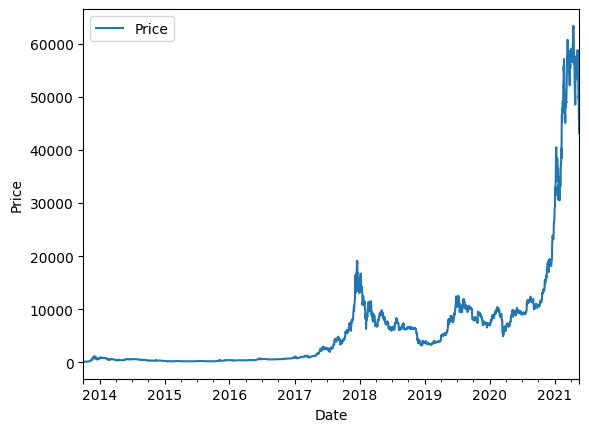

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
bitcoin_prices.plot()
plt.ylabel('Price')

In [ ]:
import csv
from datetime import datetime

In [ ]:
timesteps=[]
btc_price=[]
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',"r") as f:
  csv_reader=csv.reader(f,delimiter=',')
  next(csv_reader)#iterates though all the rows it will skip the header
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]




([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [ ]:
split_size=int(0.8*len(btc_price))
x_train, y_train=timesteps[:split_size], btc_price[:split_size]
x_test, y_test=timesteps[split_size:], btc_price[split_size:]

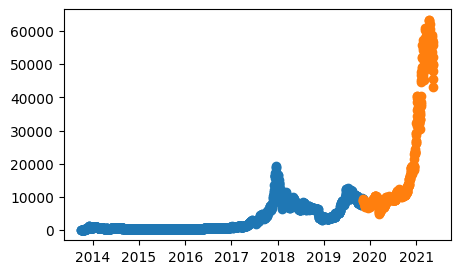

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(x_train,y_train)
plt.scatter(x_test, y_test)

In [ ]:
##naive forecast
#y(t)=y(t-1)

In [ ]:
naive_forecast=y_test[:-1]

In [ ]:
naive_forecast[:10], naive_forecast[-10:]

([9226.4858208826,
  8794.3586445233,
  8798.0420546256,
  9081.1868784913,
  8711.5343391679,
  8760.8927181435,
  8749.520591019,
  8656.970922354,
  8500.6435581622,
  8469.2608988992],
 [57107.1206718864,
  58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131])

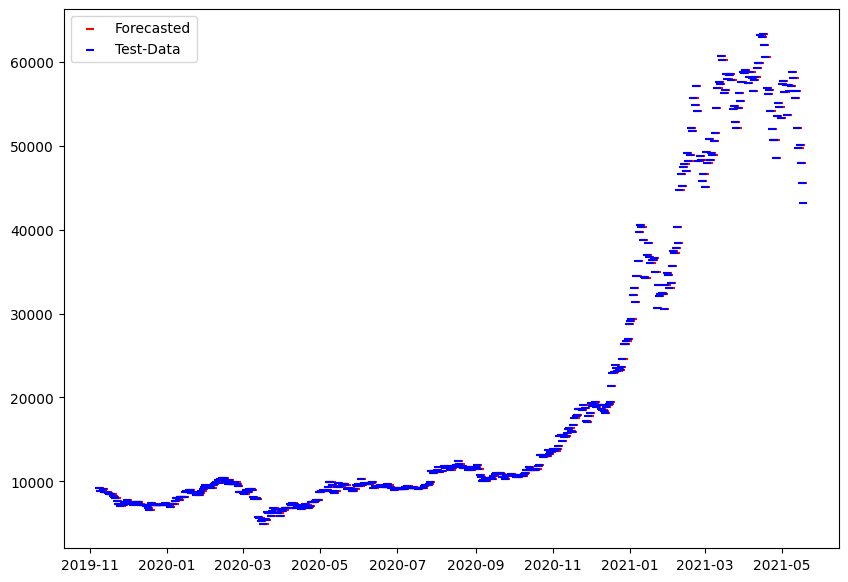

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_test[1:],naive_forecast,marker='_', color='r',label='Forecasted')
plt.scatter(x_test, y_test,marker='_', color='b', label='Test-Data')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test[1:],naive_forecast)

567.9802273457542

In [ ]:
import tensorflow as tf
#MASE
def mean_absolute_scaled_error(y_true, y_pred):
  """ Implement MASE """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))
  #find mae of naive forecast
  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae / mae_naive_no_season

In [ ]:
#mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast).numpy()

In [ ]:
def evaluate_preds(y_true, y_pred):
  #make sure float 32 data type
  y_true=tf.cast(y_true, dtype=tf.float32)
  y_pred=tf.cast(y_pred, dtype=tf.float32)

  mae=tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  return {"mae": mae.numpy(), "mse": mse.numpy(), 'rmse': rmse.numpy(), "mape": mape.numpy()}

In [ ]:
naive_results= evaluate_preds(y_true=y_test[1:],
                              y_pred=naive_forecast)

In [ ]:
naive_results

{'mae': 567.9802, 'mse': 1147547.0, 'rmse': 1071.2362, 'mape': 2.5165248}

In [ ]:
len(y_test), len(naive_forecast)

(558, 557)

In [ ]:
#global variables
HORIZON=1 #predict_next_day
window_size=7 #use past week of bitcoin data to make predictions


[[window_1],
 [window_2],
 [window_3],]

In [ ]:
def get_labelled_window(x, horizon=HORIZON):
  """ creates labels for windowed dataset

  Input: [0,1, 2, 3,4, 5, 6]
  Output=[8]

  """
  return x[:,:-horizon],x[:,-horizon:]

In [ ]:
test_window, test_label=get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_label


(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
tf.expand_dims(tf.range(8)+1, axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [ ]:
a=tf.expand_dims(tf.range(8)+1,axis=0)
a[:,:-1], a[:,-1:]

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
import numpy as np
btc_price=np.array(btc_price)
btc_price.shape

(2787,)

In [ ]:
x_train=[]
y_train=[]
for i in range(7, len(btc_price)):
  x_train.append(btc_price[i-7:i])
  y_train.append(btc_price[i])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
def train_test_splits(data,split_size):
  """ Train Test Splits"""
  x=[]
  y=[]
  for i in range(7, len(data)):
    x.append(data[i-7:i])
    y.append(data[i])
  x=np.array(x)
  y=np.array(y)
  split_size=int(0.8*len(data))
  x_train=x[:split_size]
  y_train=y[:split_size]

  x_test=x[split_size:]
  y_test=y[split_size:]
  return x_train, y_train, x_test, y_test

In [ ]:
x_train,y_train, x_test, y_test=train_test_splits(btc_price,0.8)

In [ ]:
x_train[:2],y_train[:2] , x_test[:2], y_test[:2]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ]]),
 array([123.033, 124.049]),
 array([[9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
         8711.53433917, 8760.89271814, 8749.52059102],
        [8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
         8760.89271814, 8749.52059102, 8656.97092235]]),
 array([8656.97092235, 8500.64355816]))

In [ ]:
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((2229, 7), (2229,), (551, 7), (551,))

In [ ]:
btc_price[:15]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
       126.38333, 135.24199, 133.20333])

In [ ]:
WINDOW_SIZE=7

In [ ]:
def make_window(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)

  window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T #create 2d arracy of windows

  #print(f"Window Indexes : \n {window_indexes, window_indexes.shape}")

  #index on the target array with 2D array of multiple window steps

  windowed_array=x[window_indexes]
  #print(windowed_array)
  windows, labels=get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels=make_window(btc_price, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
full_windows.shape

(2780, 7)

In [ ]:
full_labels.shape

(2780, 1)

In [ ]:
import os
save_path='model_experiment'
filepath=os.path.join(save_path)

callback=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss',save_best_only=True, save_weights_only=False)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),

],name='model_1_dense')

KeyboardInterrupt: ignored

In [ ]:
model_1.compile(loss='mae', metrics=["mae", "mse"], optimizer='adam')

In [ ]:
#model_1.summary()

In [ ]:
model_1.fit(x=x_train,y=y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/100
70/70 [==============================] - 4s 37ms/step - loss: 422.2661 - mae: 422.2661 - mse: 1082577.7500 - val_loss: 1048.0857 - val_mae: 1048.0857 - val_mse: 3533999.0000
Epoch 2/100
70/70 [==============================] - 2s 36ms/step - loss: 182.6085 - mae: 182.6085 - mse: 171722.0781 - val_loss: 931.2977 - val_mae: 931.2977 - val_mse: 2913427.5000
Epoch 3/100
70/70 [==============================] - 2s 29ms/step - loss: 160.0776 - mae: 160.0776 - mse: 132844.1562 - val_loss: 883.7022 - val_mae: 883.7022 - val_mse: 2566894.5000
Epoch 4/100
70/70 [==============================] - 1s 19ms/step - loss: 145.0917 - mae: 145.0917 - mse: 110133.2578 - val_loss: 744.2556 - val_mae: 744.2556 - val_mse: 1878410.6250
Epoch 5/100
70/70 [==============================] - 0s 6ms/step - loss: 136.3170 - mae: 136.3170 - mse: 100602.3438 - val_loss: 849.4691 - val_mae: 849.4691 - val_mse: 2052967.3750
Epoch 6/100
70/70 [==============================] - 1s 19ms/step - loss: 135.8858 

In [ ]:
model_1.evaluate(x_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 605.5292 - mae: 605.5292 - mse: 1227732.2500


[605.5292358398438, 605.5292358398438, 1227732.25]

In [ ]:
model_1=tf.keras.models.load_model('/content/model_experiment')

In [ ]:
y_pred=model_1.predict(x_test)

18/18 [==============================] - 0s 2ms/step


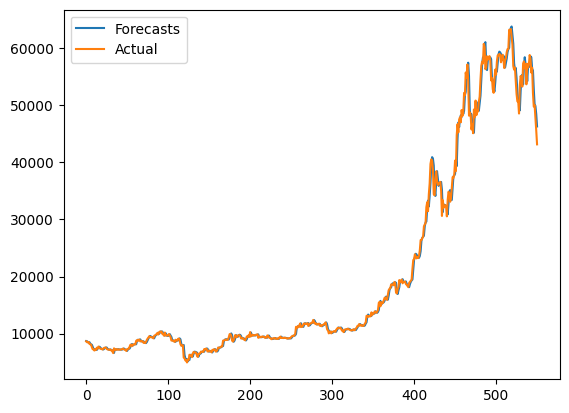

In [ ]:
plt.plot(y_pred, label='Forecasts')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

In [ ]:
y_pred=tf.squeeze(y_pred,axis=1)

In [ ]:
evaluate_preds(y_pred, y_test)

{'mae': 570.4008, 'mse': 1174857.2, 'rmse': 1083.9083, 'mape': 2.540066}

In [ ]:
#30 window size

def train_test_splits(data,split_size, window_size):
  """ Train Test Splits"""
  x=[]
  y=[]
  for i in range(window_size, len(data)):
    x.append(data[i-window_size:i])
    y.append(data[i])
  x=np.array(x)
  y=np.array(y)
  split_size=int(0.8*len(data))
  x_train=x[:split_size]
  y_train=y[:split_size]

  x_test=x[split_size:]
  y_test=y[split_size:]
  return x_train, y_train, x_test, y_test

In [ ]:
x_train, y_train, x_test, y_test=train_test_splits(btc_price, 0.8,30)

In [ ]:
import tensorflow as tf
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model_2.compile(optimizer='adam', metrics=['mae', 'mse'], loss=['mae'])

In [ ]:
model_2.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 6ms/step - loss: 645.4865 - mae: 645.4865 - mse: 2413490.2500 - val_loss: 2110.7224 - val_mae: 2110.7224 - val_mse: 11509487.0000
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 276.0321 - mae: 276.0321 - mse: 378788.7188 - val_loss: 1933.4956 - val_mae: 1933.4956 - val_mse: 9101602.0000
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 249.2792 - mae: 249.2792 - mse: 286054.5000 - val_loss: 1319.1962 - val_mae: 1319.1962 - val_mse: 5145830.5000
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 206.1596 - mae: 206.1596 - mse: 207706.5938 - val_loss: 1142.2424 - val_mae: 1142.2424 - val_mse: 4258477.5000
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 222.0006 - mae: 222.0006 - mse: 219994.9688 - val_loss: 1078.8821 - val_mae: 1078.8821 - val_mse: 3772362.2500
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 204.7

KeyboardInterrupt: ignored

In [ ]:
y_pred=tf.squeeze(model_2.predict(x_test), axis=1)
evaluate_preds(y_pred, y_test)

17/17 [==============================] - 0s 3ms/step


{'mae': 761.34717, 'mse': 1669730.6, 'rmse': 1292.1805, 'mape': 3.6506832}

In [ ]:
def train_test_splits(data, window_size, horizon):
  """ Train Test Splits"""
  x=[]
  y=[]
  for i in range(window_size, len(data)-horizon):
    x.append(data[i-window_size:i])  #i-10  1-1=0. 2-1=1 3-1=2
    y.append(data[i:i+horizon])
  x=np.array(x)
  y=np.array(y)
  split_size=int(0.8*len(data))
  x_train=x[:split_size]
  y_train=y[:split_size]

  x_test=x[split_size:]
  y_test=y[split_size:]
  return x_train, y_train, x_test, y_test

In [ ]:
x_train, y_train, x_test, y_test=train_test_splits(btc_price,30,7)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2229, 30), (2229, 7), (521, 30), (521, 7))

In [ ]:
x_train[:1]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]])

In [ ]:
y_train[:1]

array([[196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
        248.25333]])

In [ ]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='linear')
])

model_3.compile(optimizer='adam', metrics=['mae', 'mse'], loss=['mae'])

In [ ]:
model_3.fit(x=x_train,y=y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/100
70/70 [==============================] - 1s 5ms/step - loss: 1291.0956 - mae: 1291.0956 - mse: 10818775.0000 - val_loss: 2530.2119 - val_mae: 2530.2119 - val_mse: 17513772.0000
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 389.4828 - mae: 389.4828 - mse: 741962.6250 - val_loss: 1997.6951 - val_mae: 1997.6951 - val_mse: 12481378.0000
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 345.4461 - mae: 345.4461 - mse: 580440.4375 - val_loss: 1875.8224 - val_mae: 1875.8224 - val_mse: 10585011.0000
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 316.8333 - mae: 316.8333 - mse: 496656.4688 - val_loss: 1681.3987 - val_mae: 1681.3987 - val_mse: 8762772.0000
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 303.8750 - mae: 303.8750 - mse: 453973.7500 - val_loss: 1696.6248 - val_mae: 1696.6248 - val_mse: 8810407.0000
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 

In [ ]:
model_3.evaluate(x_test, y_test)

17/17 [==============================] - 0s 2ms/step - loss: 1406.5938 - mae: 1406.5938 - mse: 5977658.0000


[1406.59375, 1406.59375, 5977658.0]

In [ ]:
model_3.predict(x_test)[:5] .shape

17/17 [==============================] - 0s 1ms/step


(5, 7)

In [ ]:
y_preds=model_3.predict(x_test)
print(tf.reduce_mean(tf.keras.metrics.mean_absolute_error(y_test,y_preds)))
print(tf.reduce_mean(tf.keras.metrics.mean_squared_error(y_test,y_preds)))
print(tf.reduce_mean(tf.sqrt(tf.keras.metrics.mean_absolute_error(y_test,y_preds))))



17/17 [==============================] - 0s 2ms/step
tf.Tensor(1406.5938, shape=(), dtype=float32)
tf.Tensor(5977658.0, shape=(), dtype=float32)
tf.Tensor(32.206253, shape=(), dtype=float32)


In [ ]:
y_preds

array([[ 7199.485 ,  7372.901 ,  7527.5566, ...,  7175.9033,  7157.5664,
         7464.4707],
       [ 7197.7217,  7394.1333,  7483.7964, ...,  7210.747 ,  7240.7515,
         7411.7817],
       [ 7217.798 ,  7445.929 ,  7598.6553, ...,  7305.328 ,  7269.2393,
         7547.7275],
       ...,
       [54737.836 , 56308.312 , 57225.1   , ..., 56237.023 , 54542.156 ,
        57773.684 ],
       [55859.617 , 57011.836 , 58444.27  , ..., 56353.508 , 57281.258 ,
        57518.49  ],
       [55705.883 , 57575.45  , 58375.62  , ..., 56812.22  , 56696.535 ,
        57861.406 ]], dtype=float32)

In [ ]:
#y_test[:,0]

In [ ]:
y_preds=tf.reduce_mean(y_preds)
y_test=tf.reduce_mean(y_test)

In [ ]:
y_preds

<tf.Tensor: shape=(), dtype=float32, numpy=19910.559>

In [ ]:
#y_preds[:,0].shape

In [ ]:
x_test[:,0].shape

(521,)

In [ ]:
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [ ]:
int(0.8*len(df))
df=df.reset_index()
datestamp=df['Date']


In [ ]:
datestamp_train=datestamp[:2266]
datestamp_test=datestamp[2266:]

In [ ]:
datestamp_test.shape

(521,)

In [ ]:
#plt.plot(datestamp_test[-4:],y_preds[:,0][-4:], label='preds/forecasted')
#plt.plot(datestamp_test[-4:],x_test[:,0][-4:], label='test')
#plt.legend()

In [ ]:
datestamp_test[-10:]

2777   2021-05-09
2778   2021-05-10
2779   2021-05-11
2780   2021-05-12
2781   2021-05-13
2782   2021-05-14
2783   2021-05-15
2784   2021-05-16
2785   2021-05-17
2786   2021-05-18
Name: Date, dtype: datetime64[ns]

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
#dataset=tf.data.Dataset.from_tensor_slices(btc_price)
#ds=dataset.window(7,shift=1,drop_remainder=True)
#batch=ds.flat_map(lambda b: b.batch(1))
#for b in batch:
#  print(b.numpy())

In [ ]:
def train_test_splits(data, window_size, horizon):
  """ Train Test Splits"""
  x=[]
  y=[]
  for i in range(window_size, len(data)-horizon):
    x.append(data[i-window_size:i])  #i-10  1-1=0. 2-1=1 3-1=2
    y.append(data[i:i+horizon])
  x=np.array(x)
  y=np.array(y)
  split_size=int(0.8*len(data))
  x_train=x[:split_size]
  y_train=y[:split_size]

  x_test=x[split_size:]
  y_test=y[split_size:]
  return x_train, y_train, x_test, y_test

In [ ]:
x_train,y_train, x_test, y_test=train_test_splits(btc_price, 7,1)

In [ ]:
#conv1d takes in the form of batch size, timesteps, input_dim
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2229, 7), (2229, 1), (550, 7), (550, 1))

In [ ]:
x=tf.constant(x_train.shape[1])

In [ ]:
x

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
expand_dims_layer=tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))

In [ ]:
expand_dims_layer(x_train).shape

TensorShape([2229, 7, 1])

In [ ]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2)),
    tf.keras.layers.Conv1D(64,1, padding='causal'),
    tf.keras.layers.Conv1D(32,2, padding='causal'),
    tf.keras.layers.Dense(1, activation='linear')
]) #timesteps, input_dim


In [ ]:
model_4.compile(optimizer='adam', loss='mae', metrics=['mae', 'mse'])

In [ ]:
model_4.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
70/70 [==============================] - 2s 9ms/step - loss: 539.6439 - mae: 539.6439 - mse: 1646428.3750 - val_loss: 1254.2568 - val_mae: 1254.2568 - val_mse: 5207815.0000
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 219.4510 - mae: 219.4510 - mse: 263070.2812 - val_loss: 1196.9631 - val_mae: 1196.9631 - val_mse: 4968678.5000
Epoch 3/100
70/70 [==============================] - 0s 7ms/step - loss: 223.1044 - mae: 223.1044 - mse: 267221.7500 - val_loss: 1195.0782 - val_mae: 1195.0782 - val_mse: 4955954.0000
Epoch 4/100
11/70 [===>..........................] - ETA: 0s - loss: 204.0750 - mae: 204.0750 - mse: 201430.5938

KeyboardInterrupt: ignored

In [ ]:
model_4.evaluate(x_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 1221.5869 - mae: 1221.5869 - mse: 5038351.5000


[1221.5869140625, 1221.5869140625, 5038351.5]

In [ ]:
y_preds=model_4.predict(x_test)

18/18 [==============================] - 0s 2ms/step


In [ ]:
y_preds.shape , x_test.shape

NameError: ignored

In [ ]:
y_preds=tf.squeeze(y_preds, axis=2)


In [ ]:
y_preds[:,0].shape

TensorShape([550])

In [ ]:
print(f'MAE {tf.keras.metrics.mean_absolute_error(y_preds[:,0] ,y_test[:,0]).numpy()}')
print(f'MSE {tf.keras.metrics.mean_squared_error(y_preds[:,0] ,y_test[:,0]).numpy()}')
print(f'RMSE {tf.sqrt(tf.keras.metrics.mean_squared_error(y_preds[:,0] ,y_test[:,0])).numpy()}')



MAE 1702.3863473314018
MSE 8936523.130477538
RMSE 2989.4018014441517


In [ ]:
y_test.shape

(551,)

In [ ]:
x_train.shape

(2229, 7)

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(None,7)))
model.add(tf.keras.layers.Conv1D(64,3, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, None, 64)          1408      
                                                                 
 dense_6 (Dense)             (None, None, 1)           65        
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', metrics=['accuracy'], loss='mae')

In [ ]:
#batch_size, timesteps,input_dim

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100, batch_size=32)

RuntimeError: ignored

In [ ]:
x_train.shape

(2229, 7)

In [ ]:
#RNN LSTM
import tensorflow as tf
#input format  batch, timesteps, feature

inputs=tf.keras.layers.Input(shape=(7,))
x=tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x=tf.keras.layers.LSTM(128, activation='relu',return_sequences=True)(x)
x=tf.keras.layers.LSTM(128, activation='relu')(x)
#x=tf.keras.layers.Dense(32, activation='relu')(x)
output=tf.keras.layers.Dense(1)(x)

model_5=tf.keras.Model(inputs=inputs, outputs=output)


In [ ]:
model_5.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_4 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 128)            69632     
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 201,345
Trainable params: 201,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5.compile(loss='mae', optimizer='adam', metrics=['mse', 'mae'])
model_5.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100, batch_size=32)

Epoch 1/100
69/70 [============================>.] - ETA: 0s - loss: 1400.2599 - mse: 8101749.0000 - mae: 1400.2599

KeyboardInterrupt: ignored

In [ ]:
y_preds=model_5.predict(x_test)

18/18 [==============================] - 1s 5ms/step


In [ ]:
y_preds.shape

(550, 1)

In [ ]:
model_5.evaluate(x_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 669.1216 - mse: 1380014.2500 - mae: 669.1216


[669.1216430664062, 1380014.25, 669.1216430664062]

In [ ]:
y_preds=tf.squeeze(y_preds, axis=1)

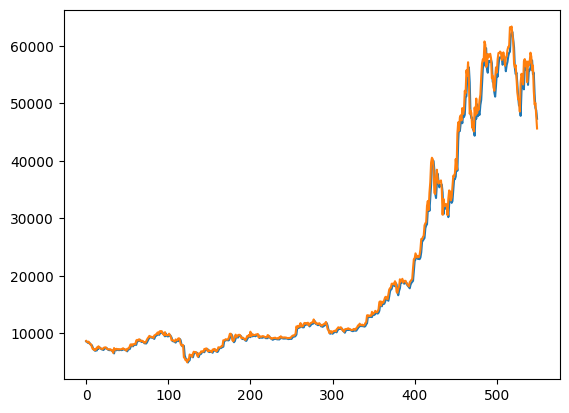

In [ ]:
plt.plot(y_preds)
plt.plot(y_test)
plt.show()

In [ ]:
#multivariate
block_reward_1=50
block_reward_2=25
block_reward_3=12.5
block_reward_4=6.25

block_reward_2_datetime=np.datetime64("2012-11-28")
block_reward_3_datetime=np.datetime64("2016-07-09")
block_reward_4_datetime=np.datetime64("2020-05-18")

In [ ]:
block_reward_2_days=(block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days


In [ ]:
block_reward_2_days

1012

In [ ]:
#add in block_reward_column
bitcoin_prices_block=bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [ ]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1]=block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1]=block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4

In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


In [ ]:
bitcoin_prices_windows=bitcoin_prices_block.copy()
for i in range(7):
  bitcoin_prices_windows[f" Price + {i+1}"]= bitcoin_prices_windows['Price'].shift(periods=i+1)
bitcoin_prices_windows.head()

,Price,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
x=bitcoin_prices_windows.dropna().drop('Price', axis=1).astype(np.float32)
y=bitcoin_prices_windows.dropna()['Price'].astype(np.float32)

In [ ]:
#x[:5], y[:5]

In [ ]:
split_size=int(len(x)*0.8)
x_train,y_train=x[:split_size],y[:split_size]
x_test, y_test=x[split_size:], y[split_size:]
x_train.shape, y_train.shape

((2224, 8), (2224,))

In [ ]:
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(128 , activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model_6.compile(optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'], loss=tf.keras.losses.MeanAbsoluteError())

In [ ]:
model_6.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, callbacks=[callback])

Epoch 1/100
139/139 [==============================] - 2s 4ms/step - loss: 365.8274 - mae: 365.8274 - mse: 1352821.1250 - val_loss: 977.7637 - val_mae: 977.7637 - val_mse: 2925322.2500
Epoch 2/100
139/139 [==============================] - 0s 3ms/step - loss: 154.3040 - mae: 154.3040 - mse: 114089.9531 - val_loss: 692.0746 - val_mae: 692.0746 - val_mse: 1590783.8750
Epoch 3/100
139/139 [==============================] - 0s 3ms/step - loss: 146.0610 - mae: 146.0610 - mse: 103718.2500 - val_loss: 1615.7125 - val_mae: 1615.7125 - val_mse: 6095739.5000
Epoch 4/100
139/139 [==============================] - 0s 3ms/step - loss: 146.4982 - mae: 146.4982 - mse: 106316.5234 - val_loss: 630.3873 - val_mae: 630.3873 - val_mse: 1381557.1250
Epoch 5/100
139/139 [==============================] - 0s 3ms/step - loss: 132.2006 - mae: 132.2006 - mse: 89405.7344 - val_loss: 612.5419 - val_mae: 612.5419 - val_mse: 1315428.3750
Epoch 6/100
139/139 [==============================] - 0s 3ms/step - loss: 148

In [ ]:
model_6.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 579.9634 - mae: 579.9634 - mse: 1195723.0000


[579.96337890625, 579.96337890625, 1195723.0]

In [ ]:
y_preds=model_6.predict(x_test)

18/18 [==============================] - 0s 2ms/step


In [ ]:
y_preds.shape

(556, 1)

**NBEATS**

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, input_size, theta_size,horizon,n_neurons,
               n_layers,**kwargs):
    super().__init__(**kwargs)
    self.input_size=input_size
    self.theta_size=theta_size
    self.horizon=horizon
    self.n_neurons=n_neurons
    self.n_layers=n_layers


    self.hidden=[tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    #output of block is a theta layer with linear activation
    self.theta_layer=tf.keras.layers.Dense(theta_size,activation='linear', name='theta')

  def call(self, inputs):
    x=inputs
    for layer in self.hidden:
      x=layer(x)
    theta=self.theta_layer(x)
    #backcast and forecast
    backcast, forecast = theta[:,:self.input_size], theta[:,-self.horizon]
    return backcast, forecast

In [ ]:
dummy_nbeats_block_layer=NBeatsBlock(input_size=7, theta_size=7+1,horizon=1,n_neurons=128,n_layers=4)
# window size (lookback period) #input_size


In [ ]:
#create dummy inputs

In [ ]:
dummy_inputs=tf.expand_dims(tf.range(7)+1, axis=0) #input shape has to match dense layer requirement

In [ ]:
dummy_inputs.shape

TensorShape([1, 7])

In [ ]:
#pass dummy inputs to Nbeats Block layer
backcast, forecast=dummy_nbeats_block_layer(dummy_inputs)

In [ ]:
backcast.numpy() , forecast.numpy()

(array([[-0.35631412, -0.41682023, -1.4364034 , -0.23311567, -0.04788192,
          0.9073975 ,  0.48916826]], dtype=float32),
 array([0.3200881], dtype=float32))

In [ ]:
#preparing data for Nbeats with tf.data


In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
btc_price.shape

(2787,)

In [ ]:
#windowing the data
x,y=[],[]
for i in range(7, len(btc_price)):
  x.append(btc_price[i-7:i])
  y.append(btc_price[i])
x=np.array(x)
y=np.array(y)
split_size=int(0.8*len(btc_price))
x_train=x[:split_size]
y_train=y[:split_size]
x_test=x[split_size:]
y_test=y[split_size:]


In [ ]:
x_train.shape , y_train.shape

((2229, 7), (2229,))

In [ ]:
train_ds=tf.data.Dataset.from_tensor_slices((x_train)).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=tf.data.Dataset.from_tensor_slices((x_test)).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

train_labels=tf.data.Dataset.from_tensor_slices((y_train)).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_labels=tf.data.Dataset.from_tensor_slices((y_test)).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

train_dataset=tf.data.Dataset.zip((train_ds, train_labels))
test_dataset=tf.data.Dataset.zip((test_ds, test_labels))

In [ ]:
train_dataset, test_dataset

(<_ZipDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_ZipDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
#Hyperparameters
N_EPOCHS=5000
N_NEURONS=512
N_LAYERS=4
N_STACKS=30

INPUT_SIZE=7*1 #window size * horizon @lookback period from the paper
THETA_SIZE=INPUT_SIZE+1 #backcast  + forecast  Lookback period is 7 and Horizon is 1


# the N BEATS USES double residual stacking to help train deeper architecture



In [ ]:
#adding subtractor layer tensors
tensor_1= tf.range(10)+10
tensor_2=tf.range(10)
#subtract
print(tensor_1), print(tensor_2)
tf.keras.layers.subtract([tensor_1, tensor_2]) , tf.keras.layers.add([tensor_1, tensor_2])

tf.Tensor([10 11 12 13 14 15 16 17 18 19], shape=(10,), dtype=int32)
tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

In [ ]:
nbeats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS
                               )

#create input to stack
stack_input=tf.keras.layers.Input(shape=(INPUT_SIZE), name='stack_input')
#create initial backcast and forecast
residuals, forecast=nbeats_block_layer(stack_input)


#create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)):
  #use the N BEATS block to calculate the backcast and forecast
  backcast, block_forecast=NBeatsBlock(input_size=INPUT_SIZE,
                                       theta_size=THETA_SIZE,
                                       horizon=HORIZON,
                                       n_neurons=N_NEURONS,
                                       n_layers=N_LAYERS) (residuals)

  residuals=tf.keras.layers.subtract([residuals, backcast])
  forecast=tf.keras.layers.add([forecast, block_forecast])
#put the stack model together

model_7=tf.keras.Model(inputs=stack_input, outputs=forecast)

In [ ]:
#compile
model_7.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

In [ ]:
model_7.summary()

In [ ]:
callbacks_es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, min_delta=0.001, restore_best_weights=True)
callback_lrop=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=100)

In [ ]:
model_7.fit(train_dataset, validation_data=test_dataset, epochs=5000, verbose=1,callbacks=[callbacks_es, callback_lrop])

Epoch 1/5000
70/70 [==============================] - 58s 371ms/step - loss: 452.2123 - mae: 452.1782 - mse: 988811.7500 - val_loss: 1767.8473 - val_mae: 1790.0825 - val_mse: 7203832.0000 - lr: 0.0010
Epoch 2/5000
70/70 [==============================] - 23s 331ms/step - loss: 234.0756 - mae: 234.6725 - mse: 264873.6250 - val_loss: 1849.0077 - val_mae: 1819.8624 - val_mse: 7042878.0000 - lr: 0.0010
Epoch 3/5000
70/70 [==============================] - 25s 355ms/step - loss: 209.8457 - mae: 211.6097 - mse: 182882.2656 - val_loss: 1406.4967 - val_mae: 1631.2465 - val_mse: 6599957.5000 - lr: 0.0010
Epoch 4/5000
70/70 [==============================] - 24s 337ms/step - loss: 229.6556 - mae: 230.2499 - mse: 225357.4219 - val_loss: 1431.9232 - val_mae: 1431.9883 - val_mse: 4419443.0000 - lr: 0.0010
Epoch 5/5000
70/70 [==============================] - 24s 342ms/step - loss: 175.7819 - mae: 176.4550 - mse: 148039.8594 - val_loss: 1282.3024 - val_mae: 1281.5470 - val_mse: 3667680.7500 - lr: 0.

KeyboardInterrupt: ignored

In [ ]:
model_7.evaluate(test_dataset)

In [ ]:
preds=model_7.predict(test_dataset)

In [ ]:
preds.shape

In [ ]:
plt.plot(preds)
plt.plot(y_test)

In [ ]:
#Ensembling
#constructing ensemble of models

In [ ]:
HORIZON

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]):
  """
  Returns a list of num_ter models each trained on MAE, MSE, and MAPE loss

  For example, if num_iter=10 a list of 30 models will be returned
  """
  ensemble_models=[]
  #create num_iter number of models per loss function
  for i in range(num_iter):
    #build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f'optimizing model by reducing {loss_function} for {num_epochs} epochs , model_number: {i}')
      #construct a simple model (similar to model_1)
      model=tf.keras.Sequential([
          tf.keras.layers.Dense(128, kernel_initializer='he_normal' ,activation='relu'),
          tf.keras.layers.Dense(128,  kernel_initializer='he_normal',activation='relu'),
          tf.keras.layers.Dense(HORIZON)
      ])

      model.compile(loss=loss_function, optimizer=tf.keras.optimizers.Adam(), metrics=['mae','mse'])

      model.fit(train_data, epochs=num_epochs, validation_data=test_data, verbose=0,callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                                                                      patience=200,
                                                                                                                      restore_best_weights=True),
                                                                                     tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                                                                          patience=100,verbose=1)])
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
ensemble_models=get_ensemble_models(num_iter=5, num_epochs=1000)

optimizing model by reducing mae for 1000 epochs , model_number: 0

Epoch 282: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 449: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 549: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
optimizing model by reducing mse for 1000 epochs , model_number: 0

Epoch 109: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 220: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 320: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
optimizing model by reducing mape for 1000 epochs , model_number: 0

Epoch 141: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 241: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing mae for 1000 epochs , model_number: 1

Epoch 148: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 248:

In [ ]:
#make prediction with ensemble models

def make_ensemble_preds(ensemble_models, data):
  ensemble_preds=[]
  for model in ensemble_models:
    preds=model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))




In [ ]:
ensemble_preds=make_ensemble_preds(ensemble_models=ensemble_models, data=test_dataset)

18/18 [==============================] - 0s 2ms/step


In [ ]:
ensemble_preds.shape

TensorShape([15, 551])

In [ ]:
mean_preds=tf.reduce_mean(ensemble_preds, axis=0)

In [ ]:
tf.keras.metrics.mean_absolute_error(mean_preds, y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=571.2481145781449>

In [ ]:
#range predictions model
def upper_lower(preds):
  std=tf.math.reduce_std(preds,axis=0)
  interval=1.96*std
  preds_mean=tf.reduce_mean(preds, axis=0)

  lower,upper=preds_mean-interval, preds_mean+interval

  return lower,upper
